In [4]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
pd.set_option('display.expand_frame_repr', False) 
sns.set_style("whitegrid") 
%matplotlib inline    

In [9]:
df = pd.read_csv('eurovision_2016-25.csv', encoding='latin-1')

In [10]:
print(df.shape)
print(df.head())
#dataset con 33 colonne

(358, 33)
   Year    Country           Song               Artist   Final_Place  Final_Points  Top 5  Top 10  Running_Order_Final  Grand_Final_Ind  ...  Language4  Multiple_Language  National_Language_Used  EU  NATO  Country_Group  MyESB_Community MyESB_Personal  OGAE_Points  Qualification_Record
0  2025     Albania          Zjerm  Shkodra Elektronike          NaN           NaN    NaN     NaN                  NaN              NaN  ...        NaN                  0                    True   0     1       Southern                4             17          158              0.550000
1  2025     Armenia       Survivor                 Parg          NaN           NaN    NaN     NaN                  NaN              NaN  ...        NaN                  0                   False   0     0  South-Eastern               30             30            0              0.812500
2  2025   Australia  Milkshake Man                Go-Jo          NaN           NaN    NaN     NaN                  NaN           

##  Dataset Info

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    358 non-null    int64  
 1   Country                 358 non-null    object 
 2   Song                    358 non-null    object 
 3   Artist                  358 non-null    object 
 4   Final_Place             206 non-null    float64
 5   Final_Points            206 non-null    float64
 6   Top 5                   278 non-null    float64
 7   Top 10                  283 non-null    float64
 8   Running_Order_Final     207 non-null    float64
 9   Grand_Final_Ind         327 non-null    float64
 10  Big6_Ind                358 non-null    int64  
 11  Semi_Final_Num          305 non-null    float64
 12  Semi_Place              274 non-null    float64
 13  Semi_Points             274 non-null    float64
 14  Running_Order_Semi      305 non-null    fl

In [13]:
print(df.describe())

              Year  Final_Place  Final_Points       Top 5      Top 10  Running_Order_Final  Grand_Final_Ind    Big6_Ind  Semi_Final_Num  Semi_Place  ...  Solo_Artist  Returning_Artist_Ind  Number of Members  Multiple_Language          EU        NATO  MyESB_Community  MyESB_Personal  OGAE_Points  Qualification_Record
count   358.000000   206.000000    206.000000  278.000000  283.000000           207.000000       327.000000  358.000000      305.000000  274.000000  ...   358.000000            358.000000         358.000000         358.000000  358.000000  358.000000       358.000000      358.000000   358.000000            312.000000
mean   2020.396648    13.378641    181.320388    0.075540    0.148410            13.439614         0.651376    0.148045        1.508197    9.102190  ...     0.731844              0.094972           1.675978           0.189944    0.597765    0.581006        20.452514       20.452514    62.863128              0.582335
std       3.019858     7.452112    152.559510 

In [14]:
print(df.columns)

Index(['Year', 'Country ', 'Song ', 'Artist ', 'Final_Place', 'Final_Points',
       'Top 5', 'Top 10', 'Running_Order_Final', 'Grand_Final_Ind', 'Big6_Ind',
       'Semi_Final_Num', 'Semi_Place', 'Semi_Points', 'Running_Order_Semi',
       'National_Final', 'Solo_Artist', 'Sex', 'Returning_Artist_Ind',
       'Number of Members', 'Language1', 'Language2', 'Language3', 'Language4',
       'Multiple_Language', 'National_Language_Used', 'EU', 'NATO',
       'Country_Group', 'MyESB_Community', 'MyESB_Personal', 'OGAE_Points',
       'Qualification_Record'],
      dtype='object')


## Check Missing Values

In [15]:
print(df.isnull().sum())

Year                        0
Country                     0
Song                        0
Artist                      0
Final_Place               152
Final_Points              152
Top 5                      80
Top 10                     75
Running_Order_Final       151
Grand_Final_Ind            31
Big6_Ind                    0
Semi_Final_Num             53
Semi_Place                 84
Semi_Points                84
Running_Order_Semi         53
National_Final              0
Solo_Artist                 0
Sex                         0
Returning_Artist_Ind        0
Number of Members           0
Language1                   0
Language2                 290
Language3                 351
Language4                 356
Multiple_Language           0
National_Language_Used      0
EU                          0
NATO                        0
Country_Group               0
MyESB_Community             0
MyESB_Personal              0
OGAE_Points                 0
Qualification_Record       46
dtype: int

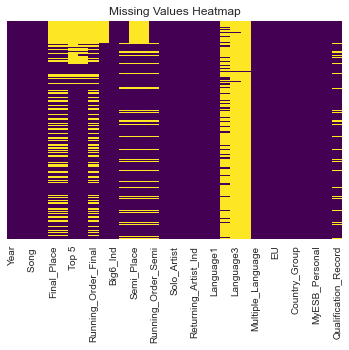

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

è normale che ci siano valori nulli nelle seguenti features:
Final_Place              
Final_Points
Top 5                     
Top 10                     
Running_Order_Final       
Grand_Final_Ind            
nel caso in cui gli artisti non abbiano passato le semifinali

Language1                   0
Language2                 290
Language3                 351
Language4                 356

per queste features è corretto che Language1 abbia 0 nulli, data che è la lingua principale della canzone, mentre la stessa canzone può contenere più di una lingua.
queste features saranno trattate con feature engineering più avanti

Semi_Final_Num             53
Semi_Place                 84
Semi_Points                84
Running_Order_Semi         53

Uno dei motivi per cui non ci sono dati in queste features è che l'artista appartiene ai Big 5, quindi accede di diritto alla finale senza passare per le semifinali.
Ulteriori casistiche verranno analizzate successivamente

## Target Variable Analysis for Regression

# Identificazione della variabile TARGET per la regressione
#  colonne come 'points', 'total_points', o simili

In [19]:
# Prima di scegliere il target, vediamo TUTTE le colonne disponibili
print("=" * 60)
print("TUTTE LE COLONNE DEL DATASET:")
print("=" * 60)
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    n_unique = df[col].nunique()
    print(f"{i:2d}. {col:30s} | Tipo: {str(dtype):10s} | Valori unici: {n_unique}")

print("\n" + "=" * 60)
print("PRIME RIGHE DEL DATASET (per capire i dati):")
print("=" * 60)
print(df.head(10))

TUTTE LE COLONNE DEL DATASET:
 1. Year                           | Tipo: int64      | Valori unici: 9
 2. Country                        | Tipo: object     | Valori unici: 46
 3. Song                           | Tipo: object     | Valori unici: 355
 4. Artist                         | Tipo: object     | Valori unici: 354
 5. Final_Place                    | Tipo: float64    | Valori unici: 26
 6. Final_Points                   | Tipo: float64    | Valori unici: 154
 7. Top 5                          | Tipo: float64    | Valori unici: 2
 8. Top 10                         | Tipo: float64    | Valori unici: 2
 9. Running_Order_Final            | Tipo: float64    | Valori unici: 26
10. Grand_Final_Ind                | Tipo: float64    | Valori unici: 2
11. Big6_Ind                       | Tipo: int64      | Valori unici: 2
12. Semi_Final_Num                 | Tipo: float64    | Valori unici: 2
13. Semi_Place                     | Tipo: float64    | Valori unici: 19
14. Semi_Points         

## Identificazione Target per Regressione


In [22]:
# Selezione della variabile TARGET per la regressione
# Target: Final_Points (punteggio finale nella competizione Eurovision)

target = 'Final_Points'

print(f"Target variable: {target}")
print(df[target].describe())

Target variable: Final_Points
count    206.000000
mean     181.320388
std      152.559510
min        0.000000
25%       75.250000
50%      126.500000
75%      260.000000
max      758.000000
Name: Final_Points, dtype: float64


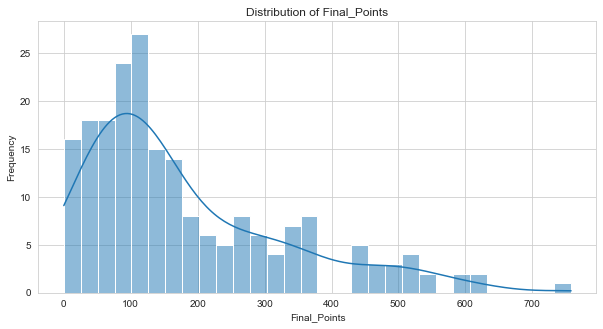

In [23]:
# Distribuzione della variabile target
# Histogram: mostra frequenza dei valori
# KDE (Kernel Density Estimation): curva di densità di probabilità
# Importante per capire se i dati sono normali, skewed, bimodali, etc.

plt.figure(figsize=(10, 5))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

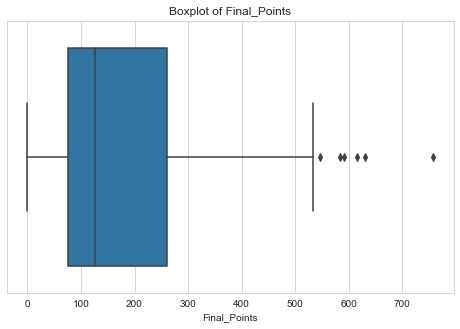

In [24]:
# Boxplot per individuare outliers
# La scatola mostra Q1, mediana, Q3
# I "baffi" mostrano il range
# I punti isolati sono potenziali outliers
# Utile per decidere se rimuovere/trattare valori estremi

plt.figure(figsize=(8, 5))
sns.boxplot(x=df[target])
plt.title(f'Boxplot of {target}')
plt.show()

## Categorical Variables Analysis

In [25]:
# Identifico tutte le colonne categoriche (tipo 'object')
# Queste sono variabili non numeriche (testo): country, year, etc.
# Dovranno essere encodate per il modello di ML

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
Index(['Country ', 'Song ', 'Artist ', 'Sex', 'Language1', 'Language2',
       'Language3', 'Language4', 'Country_Group'],
      dtype='object')


In [31]:
# Analisi della variabile "country" (o simili)
# Mostra quali paesi appaiono più frequentemente
# Utile per capire il bilanciamento del dataset

if 'country' in df.columns or 'to_country' in df.columns or 'To_country' in df.columns:
    country_col = 'country' if 'country' in df.columns else ('to_country' if 'to_country' in df.columns else 'To_country')
    
    print(f"\n{country_col} value counts:")
    print(df[country_col].value_counts().head(10))
    
    # Grafico a barre orizzontali dei top 15 paesi
    plt.figure(figsize=(12, 6))
    df[country_col].value_counts().head(15).plot(kind='barh')
    plt.title(f'Top 15 {country_col}')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()


Year value counts:
2016    42
2017    42
2018    43
2019    41
2021    39
2022    40
2023    37
2024    37
2025    37
Name: Year, dtype: int64


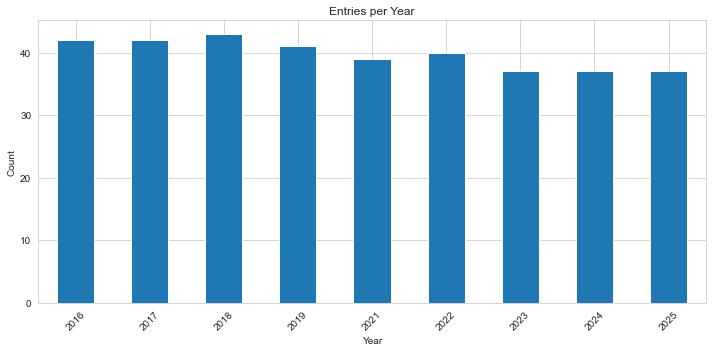

In [30]:
# Analisi della variabile "year"
# Mostra distribuzione temporale dei dati
# Importante per capire se ci sono trend negli anni

if 'year' in df.columns or 'Year' in df.columns:
    year_col = 'Year' if 'Year' in df.columns else 'year'
    
    print("\nYear value counts:")
    print(df[year_col].value_counts().sort_index())
    
    # Grafico a barre delle partecipazioni per anno
    plt.figure(figsize=(10, 5))
    df[year_col].value_counts().sort_index().plot(kind='bar')
    plt.title('Entries per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Numerical Variables Analysis


Numeric columns:
Index(['Year', 'Final_Place', 'Final_Points', 'Top 5', 'Top 10',
       'Running_Order_Final', 'Grand_Final_Ind', 'Big6_Ind', 'Semi_Final_Num',
       'Semi_Place', 'Semi_Points', 'Running_Order_Semi', 'National_Final',
       'Solo_Artist', 'Returning_Artist_Ind', 'Number of Members',
       'Multiple_Language', 'EU', 'NATO', 'MyESB_Community', 'MyESB_Personal',
       'OGAE_Points', 'Qualification_Record'],
      dtype='object')


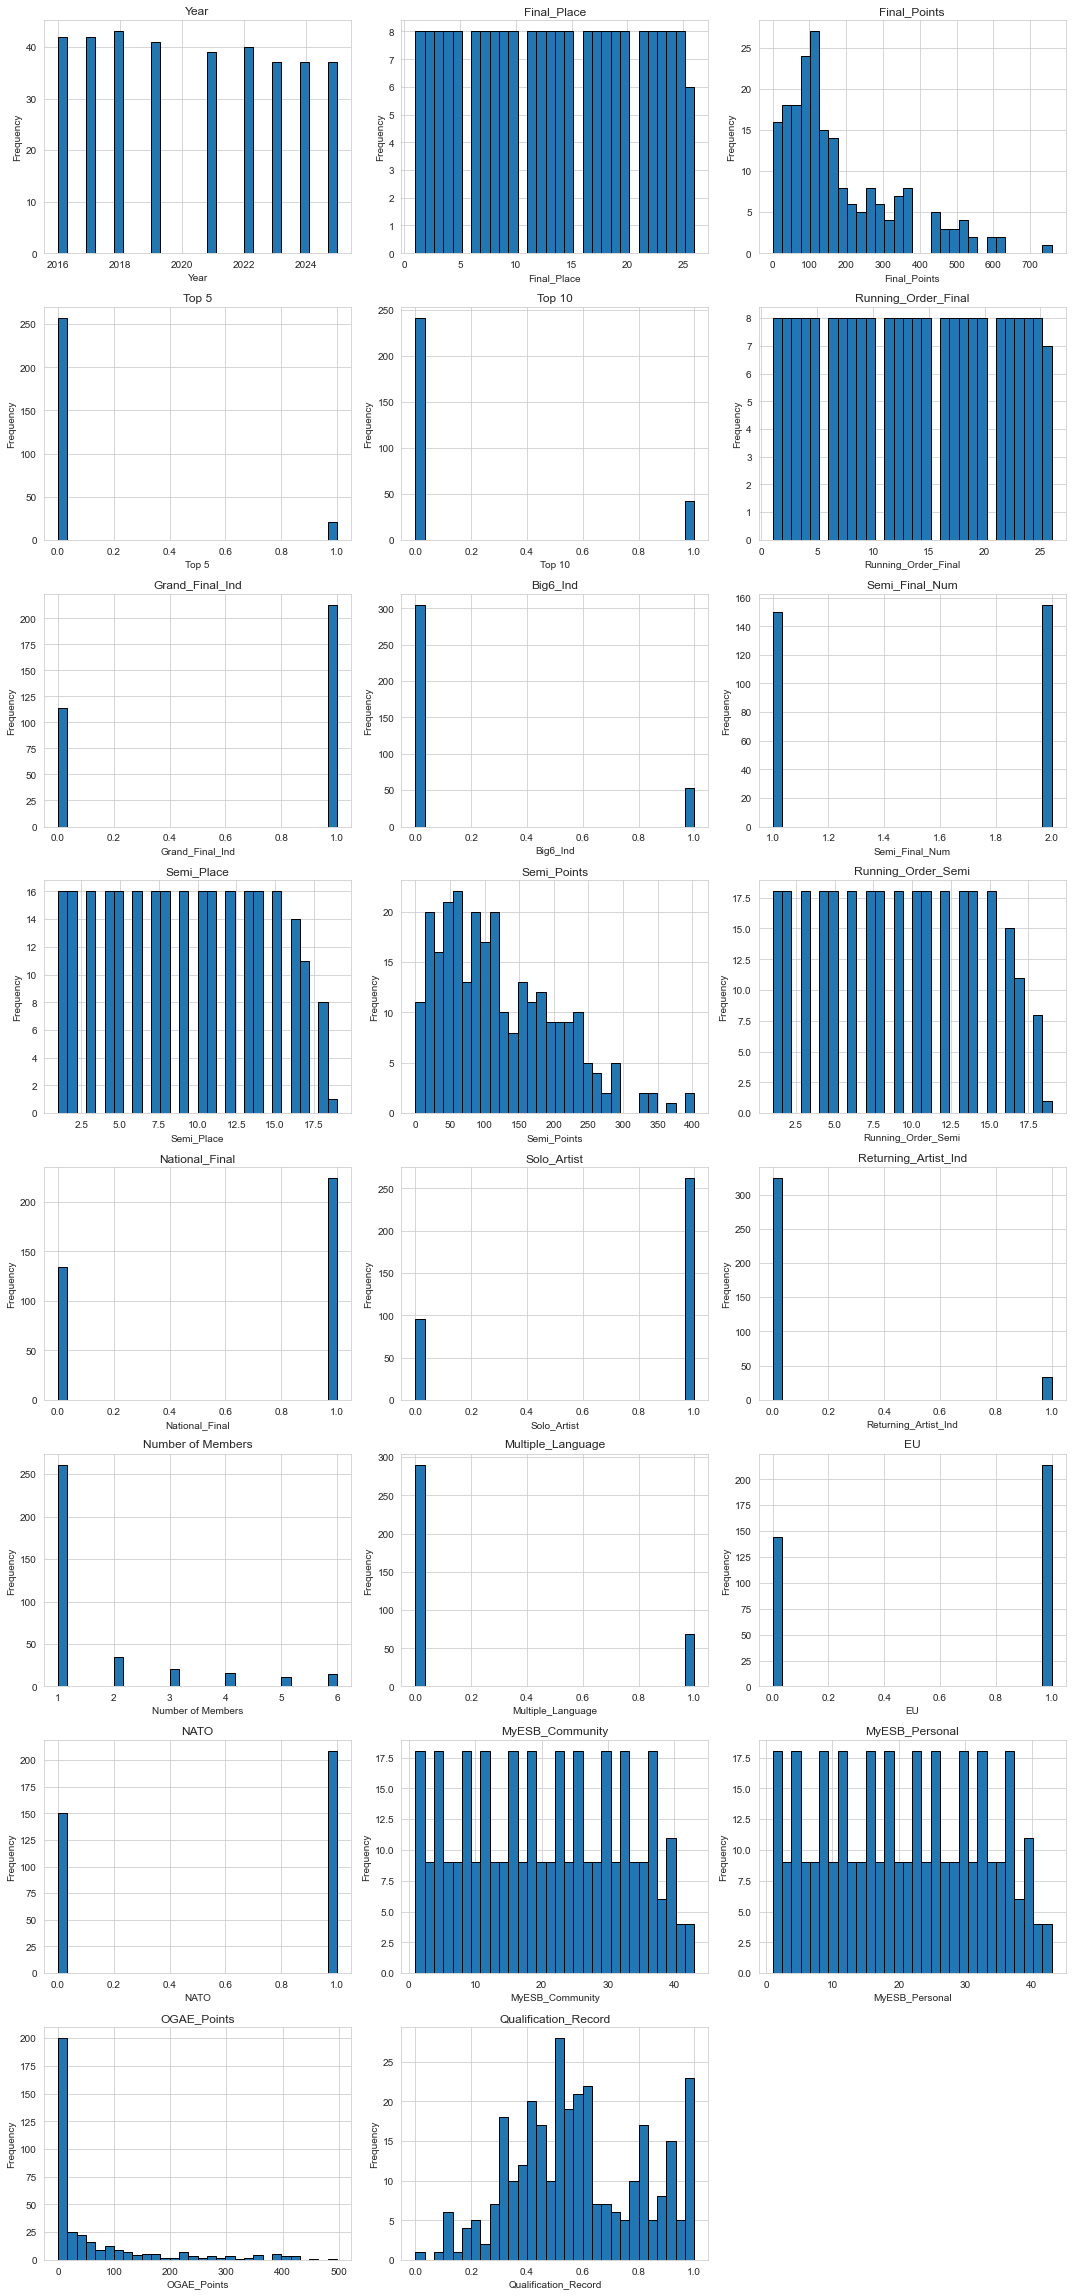

In [32]:
# Identifico tutte le variabili numeriche
# Queste possono essere usate direttamente come features

numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:")
print(numeric_cols)

# Creo istogrammi per ogni variabile numerica
# Mostra la distribuzione di ciascuna feature
n_cols = len(numeric_cols)
if n_cols > 0:
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black')
        axes[idx].set_title(f'{col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
    
    # Nascondi subplot non utilizzati
    for idx in range(n_cols, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## Correlation Analysis

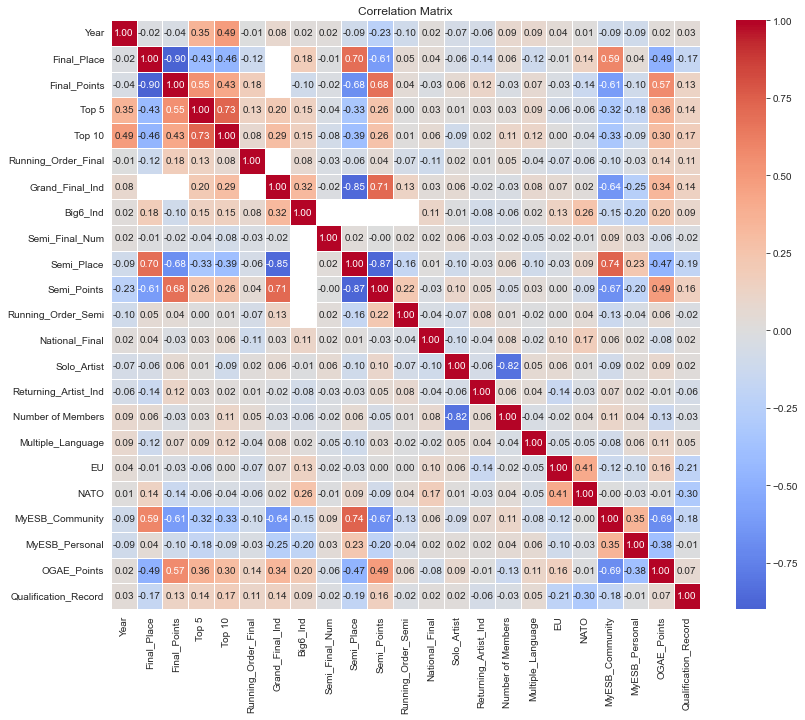


Correlations with Final_Points:
Final_Points            1.000000
Semi_Points             0.675753
OGAE_Points             0.568648
Top 5                   0.547425
Top 10                  0.427545
Running_Order_Final     0.176726
Qualification_Record    0.131099
Returning_Artist_Ind    0.117277
Multiple_Language       0.070448
Solo_Artist             0.057835
Running_Order_Semi      0.040760
Semi_Final_Num         -0.023838
National_Final         -0.025163
Number of Members      -0.031887
EU                     -0.034682
Year                   -0.040764
Big6_Ind               -0.095397
MyESB_Personal         -0.095453
NATO                   -0.136312
MyESB_Community        -0.611205
Semi_Place             -0.682110
Final_Place            -0.897531
Grand_Final_Ind              NaN
Name: Final_Points, dtype: float64


In [33]:
# MATRICE DI CORRELAZIONE
# Mostra quanto le variabili numeriche sono correlate tra loro
# Valori vicini a +1/-1 = forte correlazione
# Valori vicini a 0 = nessuna correlazione
# IMPORTANTE: identifica features ridondanti e relazioni con il target

numeric_df = df.select_dtypes(include=[np.number])

if len(numeric_df.columns) > 1:
    plt.figure(figsize=(12, 10))
    correlation = numeric_df.corr()
    
    # Heatmap con valori annotati
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True, linewidths=1)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Stampa le correlazioni più forti con il target
    if target in correlation.columns:
        print(f"\nCorrelations with {target}:")
        print(correlation[target].sort_values(ascending=False))

## Relationships with Target Variable

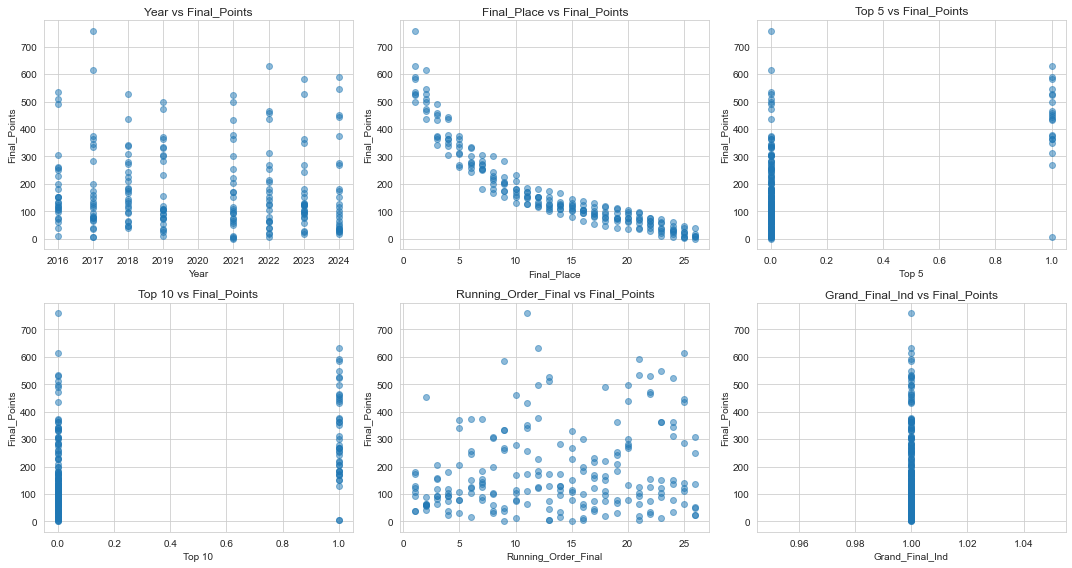

In [34]:
# SCATTER PLOTS: Features vs Target
# Mostra la relazione tra ogni feature numerica e il target
# Aiuta a identificare:
# - Relazioni lineari (per linear regression)
# - Relazioni non lineari (serve modelli più complessi)
# - Outliers che influenzano la predizione

numeric_features = [col for col in numeric_cols if col != target]

if len(numeric_features) > 0:
    n_features = min(6, len(numeric_features))  # Massimo 6 plot
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    for idx, feature in enumerate(numeric_features[:n_features]):
        axes[idx].scatter(df[feature], df[target], alpha=0.5)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel(target)
        axes[idx].set_title(f'{feature} vs {target}')
    
    # Nascondi subplot non utilizzati
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

In [39]:
# Target per categoria (es. per paese)
# Boxplot mostra come il target varia per diverse categorie
# Utile per capire se la variabile categorica è predittiva
# Es: alcuni paesi ricevono sistematicamente più punti?

if 'country' in df.columns or 'to_country' in df.columns or 'To_country' in df.columns:
    country_col = 'country' if 'country' in df.columns else ('to_country' if 'to_country' in df.columns else 'To_country')
    
    # Seleziono solo i top 10 paesi (per leggibilità)
    top_countries = df[country_col].value_counts().head(10).index
    df_top = df[df[country_col].isin(top_countries)]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=country_col, y=target, data=df_top)
    plt.title(f'{target} by {country_col} (Top 10)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##  Summary Statistics

In [38]:
# Riepilogo delle informazioni chiave trovate durante l'EDA

print("SUMMARY")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nTarget variable: {target}")
print(f"  Min: {df[target].min():.2f}")
print(f"  Max: {df[target].max():.2f}")
print(f"  Mean: {df[target].mean():.2f}")
print(f"  Median: {df[target].median():.2f}")
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")


SUMMARY
Dataset shape: 358 rows × 33 columns

Target variable: Final_Points
  Min: 0.00
  Max: 758.00
  Mean: 181.32
  Median: 126.50

Missing values: 1958
Duplicate rows: 0
